In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [38]:
data = pd.read_json('data/times.json')['session1'].values

In [39]:
# get only the times
times = []
i = 1
for l in data:
    nl = list()
    nl.append(i)
    nl.append(l[0][1]/1000)
    times.append(nl)
    i += 1
times = np.array(times)

In [40]:
# Calculate the 10th and 90th percentile thresholds to filter the times
lower_threshold = np.percentile(times[:,1], 10)
upper_threshold = np.percentile(times[:,1], 90)

filtered_times = times[(times[:,1] > lower_threshold) & (times[:,1] < upper_threshold)]
lower_threshold, upper_threshold

(14.358800000000002, 19.5717)

In [41]:
y = times[:, 1]
X = times[:, 0]

lin1 = linear_model.LinearRegression()
Xsample = np.c_[X]
ysample = np.c_[y]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(17.42311831103679, -0.004349448320558161)

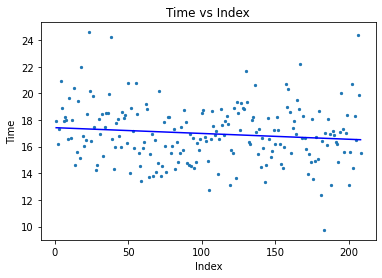

In [42]:
# plot the graph using matplotlib
plt.scatter(X, y, s=5)
plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Time vs Index')
plt.plot(X, t0 + t1*X, "b")
plt.show()


In [43]:
# Machine learning to predict my average in certain number of solves
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(Xsample, ysample)
X_new = [[1000]]
print(model.predict(X_new))

[[13.07366999]]


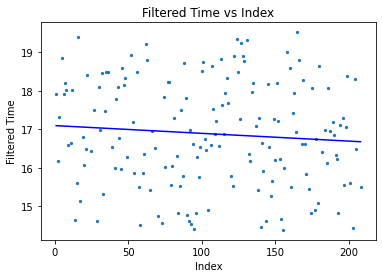

In [44]:
y = filtered_times[:, 1]
X = filtered_times[:, 0]

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[X]
ysample = np.c_[y]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

# plot the graph using matplotlib
plt.scatter(X, y, s=5)
plt.xlabel('Index')
plt.ylabel('Filtered Time')
plt.title('Filtered Time vs Index')
plt.plot(X, t0 + t1*X, "b")
plt.show()

In [45]:
# Machine learning to predict my average in certain number of solves
model = sklearn.linear_model.LinearRegression()
model.fit(Xsample, ysample)
X_new = [[200]]
print(model.predict(X_new))

[[16.69296632]]
